In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from collections import Counter
%matplotlib inline

## First of all, I Will filter the data in useful form and later will do understanding and visualization part ##

### In this project i am going to work on following three questions, which are based on Stack OverFlow data,2020.

### Question 1 : As a Python Programmer, what scope do i have currently, and whats going to happen in future ? 
### Question 2 : Do you take yours job as hobby, if yes,  what age group and gender you belong to?
### Question 3:  Which age group got good experience in Programming and do employees prefer to work full time                                or part time? Discuss about countries too in terms of employment?



In [2]:
df=pd.read_csv("survey_results_public.csv")
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
df.shape

(64461, 61)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [5]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

### Dumping the columns, which are not useful.

In [6]:
columns_to_drop = ['CompFreq','ConvertedComp','CurrencyDesc',
       'CurrencySymbol','CompTotal', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Ethnicity',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt','NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans','WebframeDesireNextYear','WorkWeekHrs',
       'WebframeWorkedWith', 'WelcomeChange',
       'YearsCodePro']
df.drop(columns_to_drop, axis=1, inplace=True)

In [7]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,Country,Employment,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,NEWJobHunt,UndergradMajor,YearsCode
0,1,I am a developer by profession,Yes,NaN,13,Germany,"Independent contractor, freelancer, or self-em...",Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,NaN,"Computer science, computer engineering, or sof...",36
1,2,I am a developer by profession,No,NaN,19,United Kingdom,Employed full-time,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,NaN,"Computer science, computer engineering, or sof...",7
2,3,I code primarily as a hobby,Yes,NaN,15,Russian Federation,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,4
3,4,I am a developer by profession,Yes,25.0,18,Albania,NaN,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,Curious about other opportunities;Wanting to w...,"Computer science, computer engineering, or sof...",7
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,United States,Employed full-time,Man,NaN,NaN,NaN,Java;Ruby;Scala,HTML/CSS;Ruby;SQL,NaN,"Computer science, computer engineering, or sof...",15


In [8]:
# Changing the column name, as mentioned name in dataset is not friendly.
df1 = df.rename(columns={'MainBranch': 'Professional'})
print(df1)

       Respondent                                       Professional Hobbyist  \
0               1                     I am a developer by profession      Yes   
1               2                     I am a developer by profession       No   
2               3                        I code primarily as a hobby      Yes   
3               4                     I am a developer by profession      Yes   
4               5  I used to be a developer by profession, but no...      Yes   
...           ...                                                ...      ...   
64456       64858                                                NaN      Yes   
64457       64867                                                NaN      Yes   
64458       64898                                                NaN      Yes   
64459       64925                                                NaN      Yes   
64460       65112                                                NaN      Yes   

        Age Age1stCode     

In [9]:
df1.head()

,Respondent,Professional,Hobbyist,Age,Age1stCode,Country,Employment,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,NEWJobHunt,UndergradMajor,YearsCode
0,1,I am a developer by profession,Yes,NaN,13,Germany,"Independent contractor, freelancer, or self-em...",Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,NaN,"Computer science, computer engineering, or sof...",36
1,2,I am a developer by profession,No,NaN,19,United Kingdom,Employed full-time,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,NaN,"Computer science, computer engineering, or sof...",7
2,3,I code primarily as a hobby,Yes,NaN,15,Russian Federation,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,4
3,4,I am a developer by profession,Yes,25.0,18,Albania,NaN,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,Curious about other opportunities;Wanting to w...,"Computer science, computer engineering, or sof...",7
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,United States,Employed full-time,Man,NaN,NaN,NaN,Java;Ruby;Scala,HTML/CSS;Ruby;SQL,NaN,"Computer science, computer engineering, or sof...",15


In [10]:
df1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29662 entries, 7 to 63955
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              29662 non-null  int64  
 1   Professional            29662 non-null  object 
 2   Hobbyist                29662 non-null  object 
 3   Age                     29662 non-null  float64
 4   Age1stCode              29662 non-null  object 
 5   Country                 29662 non-null  object 
 6   Employment              29662 non-null  object 
 7   Gender                  29662 non-null  object 
 8   JobFactors              29662 non-null  object 
 9   JobSat                  29662 non-null  object 
 10  JobSeek                 29662 non-null  object 
 11  LanguageDesireNextYear  29662 non-null  object 
 12  LanguageWorkedWith      29662 non-null  object 
 13  NEWJobHunt              29662 non-null  object 
 14  UndergradMajor          29662 non-null

In [12]:
# Saggregating all langauegs and counting  
language_counter = Counter()
for i in df1.index:
    language_counter.update(df1["LanguageWorkedWith"][i].split(";"))
languages = []
popularity = []
for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])
print(languages)
print(popularity)

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'TypeScript', 'PHP', 'C++', 'C', 'Go', 'Kotlin', 'Ruby', 'Swift']
[20774, 18421, 17122, 12447, 11218, 10888, 9673, 8778, 7129, 5647, 4820, 2800, 2430, 2333, 1788]


### This Bar Graph represents the current popularity of all programming languages.

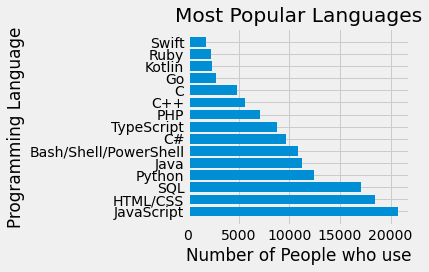

In [13]:
plt.style.use("fivethirtyeight")
plt.barh(languages,popularity)
plt.title("Most Popular Languages")
plt.ylabel("Programming Language")
plt.xlabel("Number of People who use")
plt.tight_layout()
plt.show()

In [14]:
language_counter = Counter()
for i in df1.index:
    language_counter.update(df1["LanguageDesireNextYear"][i].split(";"))
languages = []
popularity = []
for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])
print(languages)
print(popularity)

['JavaScript', 'Python', 'HTML/CSS', 'SQL', 'TypeScript', 'C#', 'Go', 'Bash/Shell/PowerShell', 'Java', 'Rust', 'Kotlin', 'C++', 'PHP', 'Swift', 'C']
[14542, 14196, 11459, 11353, 10585, 7689, 7555, 6877, 6606, 6219, 5328, 4303, 3184, 2978, 2584]


### This Bar Graph represents popularity of all programming langauges by next year.

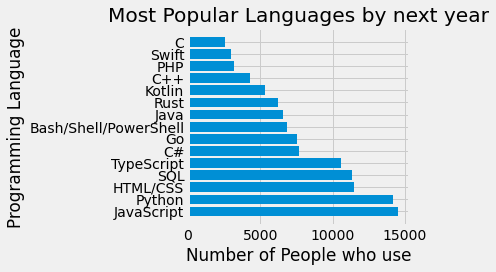

In [15]:
plt.style.use("fivethirtyeight")
plt.barh(languages,popularity)
plt.title("Most Popular Languages by next year")
plt.ylabel("Programming Language")
plt.xlabel("Number of People who use")
plt.tight_layout()
plt.show()

## Conclusion Of Question 1 :
### Comparing Both Graph Above to know that as a Python programmer i am into the right field or not, and how much scope i got in future.
As we can see in first bar graph that, Python language is on 4th no in terms of popularity but by next year its becoming second most popular language, infact its popularity is very close to JavaScript, which is most popular.

In [16]:
job_counter = Counter()
for i in df1.index:
    job_counter.update(df1["JobFactors"][i].split(";"))
job_factors = []
preferences = []
for item in job_counter.most_common(15):
    job_factors.append(item[0])
    preferences.append(item[1])
print(job_factors)
print(preferences)

['Languages, frameworks, and other technologies I’d be working with', 'Office environment or company culture', 'Flex time or a flexible schedule', 'Opportunities for professional development', 'Remote work options', 'How widely used or impactful my work output would be', 'Industry that I’d be working in', 'Family friendliness', 'Financial performance or funding status of the company or organization', 'Specific department or team I’d be working on', 'Diversity of the company or organization']
[15849, 13693, 13474, 12187, 10192, 6224, 4262, 3455, 3409, 3387, 1893]


## Question :2 Here we will try to find , what age group and gender takes their job as hobby


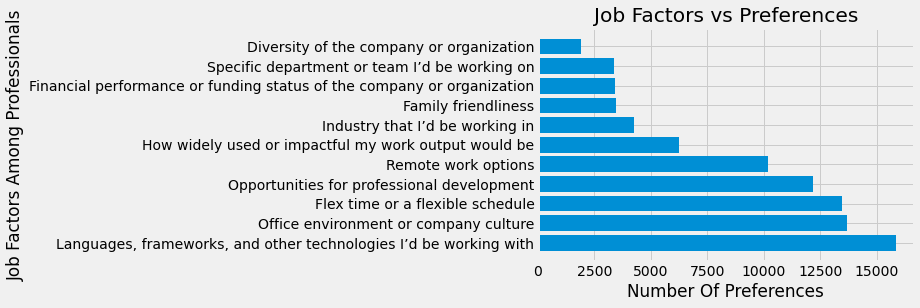

In [17]:
plt.style.use("fivethirtyeight")
plt.barh(job_factors,preferences)
plt.title("Job Factors vs Preferences")
plt.ylabel("Job Factors Among Professionals")
plt.xlabel("Number Of Preferences")
#plt.tight_layout()
plt.show()

Here we are trying to find, whether what job factors attract more people, and above bar chart depicts that people like to choose their jobs based on new technolgies and languages, so that they can learn new things

### Same thing we can represent by scatter plot, as it gives more clear view

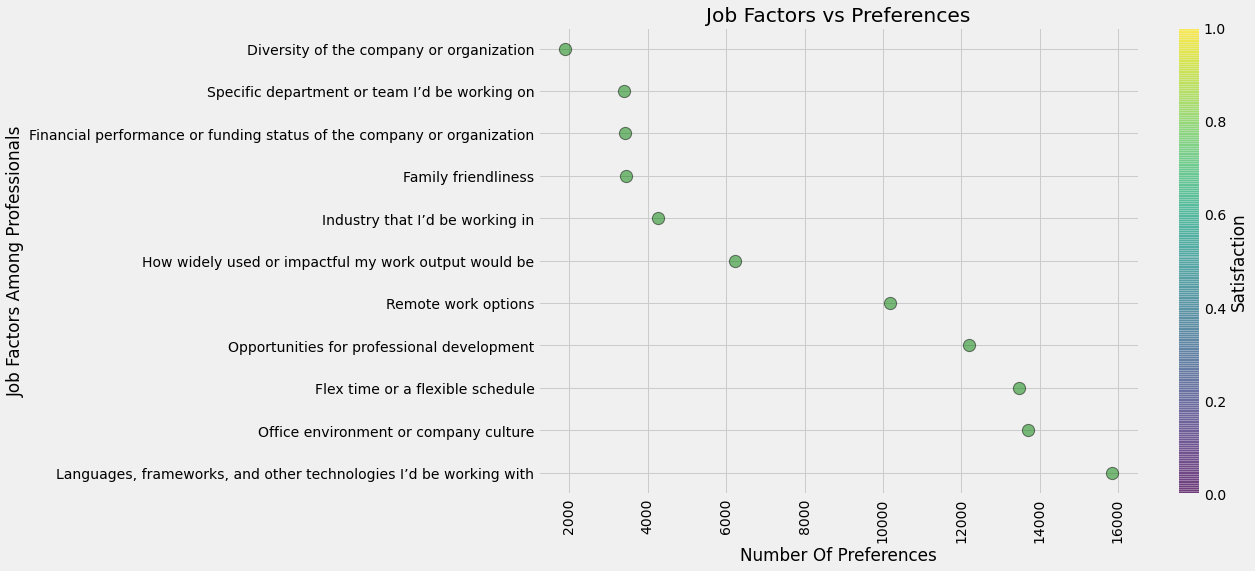

In [18]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 8))
plt.scatter(preferences,job_factors,s = 150, c = "green", cmap = "Greens", edgecolor = "black", linewidth = 1,alpha=0.5)

cbar = plt.colorbar()
cbar.set_label("Satisfaction")

plt.title("Job Factors vs Preferences")
plt.ylabel("Job Factors Among Professionals")
plt.xlabel("Number Of Preferences")
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()
 

## Below histogram depicts about age distribution , who does coding as a hobby. As we can see 20-30 age group is more interested.

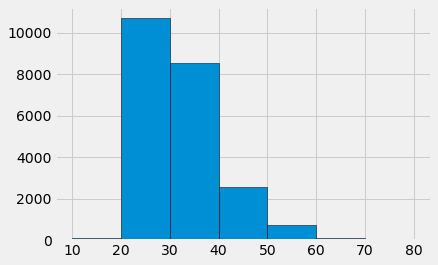

In [19]:
bins=[10,20,30,40,50,60,70,80]
plt.hist(df1[df1["Hobbyist"]=="Yes"]["Age"],bins=bins,edgecolor="black")
plt.show()

In [20]:
gender_counter = Counter()
for i in df1.index:
    gender_counter.update(df1["Gender"][i].split(";"))
gender_factors = []
numbers = []
for item in gender_counter.most_common(15):
    gender_factors.append(item[0])
    numbers.append(item[1])
print(gender_factors)
print(numbers)

['Man', 'Woman', 'Non-binary, genderqueer, or gender non-conforming']
[27270, 2229, 315]


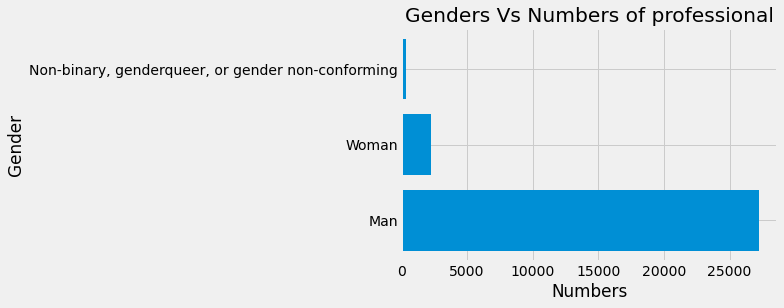

In [21]:
plt.style.use("fivethirtyeight")
plt.barh(gender_factors,numbers)
plt.title("Genders Vs Numbers of professional")
plt.ylabel("Gender")
plt.xlabel("Numbers")
#plt.tight_layout()
plt.show()

In [22]:
indexNames = df1[df1['Age'] == 279.].index
 
# Delete these row indexes from dataFrame
df1.drop(indexNames , inplace=True)

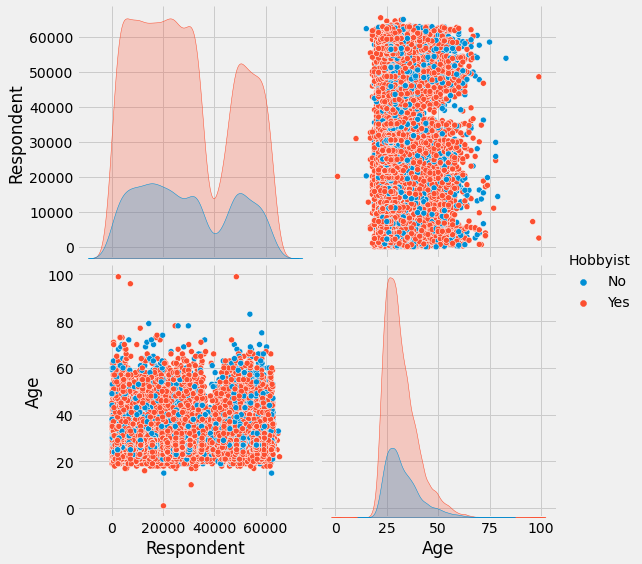

In [37]:
sns.pairplot(df1, hue="Hobbyist",height=4)
plt.show()

## Conclusion of Question :2
Based on all graphs above we can say that 20-30years old professionals take their job as hobby and their interest gets low as they grow up. In terms of Gender, Man are in large number compared to Female and Other. So we can say that Man between 20-30years are doing their jobs as a hobby.

## Question 3: Which age group got good experience in Programming and do employees prefer to work full time or part time? Discuss about countries too in terms of employment. 

In [24]:
df1['Age'].unique()

array([36. , 30. , 22. , 23. , 49. , 27. , 45. , 25. , 32. , 24. , 31. ,
       39. , 34. , 19. , 35. , 53. , 38. , 28. , 44. , 21. , 26. , 29. ,
       42. , 37. , 50. , 33. , 43. , 40. , 60. , 41. , 59. , 62. , 48. ,
       52. , 46. , 49.5, 47. , 57. , 71. , 63. , 20. , 51. , 70. , 54. ,
       55. , 18. , 56. , 64. , 65. , 58. , 99. , 68. , 61. , 73. , 69. ,
       17. , 66. , 23.8, 72. , 96. , 26.5, 24.5, 77. , 16. , 79. , 22.5,
       27.5, 74. ,  1. , 15. , 67. , 78. , 10. , 31.5, 83. , 75. ])

### Sorting out the data like YearsCode and Age column values

In [25]:
# Replacing the string values in to the integer values
df1['YearsCode'] = df1['YearsCode'].replace({'More than 50 years': '51','Less than 1 year':'0'})

In [26]:
df1 = df1.sort_values('YearsCode')

In [27]:
df1['YearsCode'] = df1['YearsCode'].replace({'1': '01', '2': '02', '3': '03', '4': '04','5':'05','6':'06','7':'07','8':'08','9':'09'})

###  From this Scatter plot its clear that employees between 60-80 years got good coding experince, and age group between 40-60 shows mix response, whereas age group between 20-40 got comparatively less experince. On average after age of 50years people leave the job or switch their career.

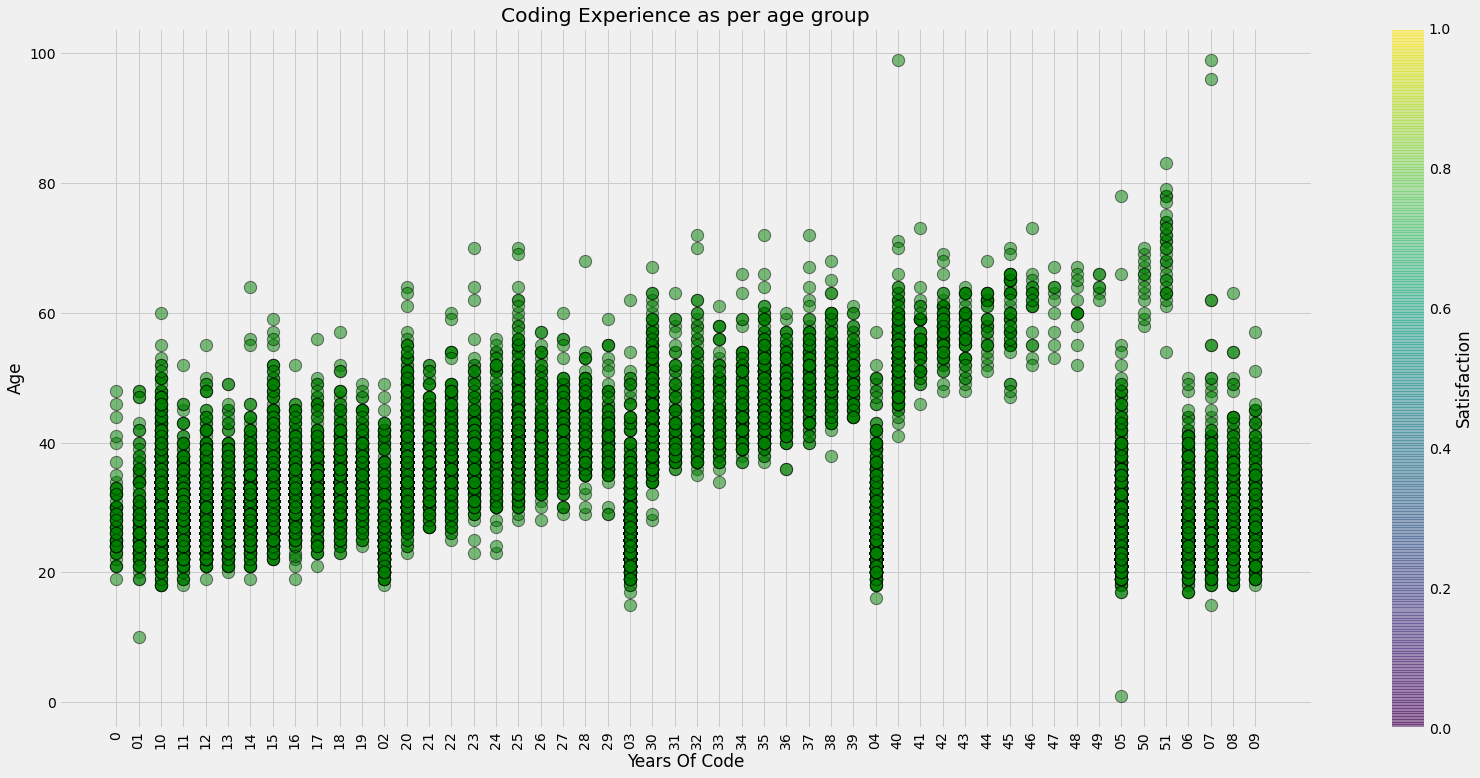

In [28]:
YearsCode = df1["YearsCode"]
Age = df1["Age"]
Employment = df1["Employment"]

plt.figure(figsize=(25, 12))
plt.scatter(YearsCode, Age, s = 150, c = "green", cmap = "Greens", edgecolor = "black", linewidth = 1,alpha=0.5)


cbar = plt.colorbar()
cbar.set_label("Satisfaction")

plt.title("Coding Experience as per age group")
plt.xlabel("Years Of Code")
plt.ylabel("Age")
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()

In [29]:
df1['Employment'].unique()

array(['Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed part-time'], dtype=object)

In [30]:
employment_counter = Counter()
for i in df1.index:
    employment_counter.update(df1["Employment"][i].split(";,or,'"))
employment_factors = []
numbers = []
for item in employment_counter.most_common(15):
    employment_factors.append(item[0])
    numbers.append(item[1])
print(employment_factors)
print(numbers)

['Employed full-time', 'Independent contractor, freelancer, or self-employed', 'Employed part-time']
[26160, 2604, 897]


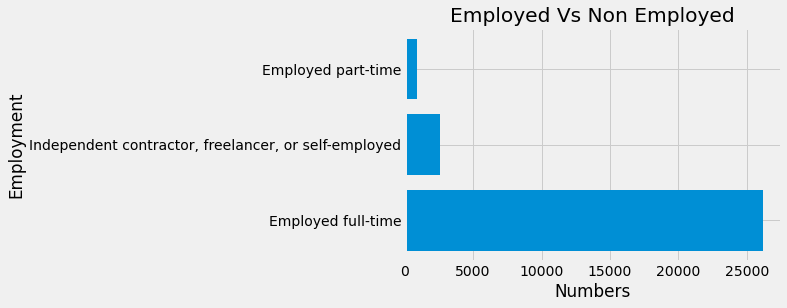

In [31]:
plt.style.use("fivethirtyeight")
plt.barh(employment_factors,numbers)
plt.title("Employed Vs Non Employed")
plt.ylabel("Employment")
plt.xlabel("Numbers")
#plt.tight_layout()
plt.show()

In [32]:
vals1 =df1.UndergradMajor.value_counts()
vals1

Computer science, computer engineering, or software engineering                   18653
Another engineering discipline (such as civil, electrical, mechanical, etc.)       2720
Information systems, information technology, or system administration              2375
A natural science (such as biology, chemistry, physics, etc.)                      1308
Mathematics or statistics                                                          1064
Web development or web design                                                       836
A business discipline (such as accounting, finance, marketing, etc.)                752
A humanities discipline (such as literature, history, philosophy, etc.)             632
A social science (such as anthropology, psychology, political science, etc.)        548
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      455
I never declared a major                                                            213
A health science (such as nursin

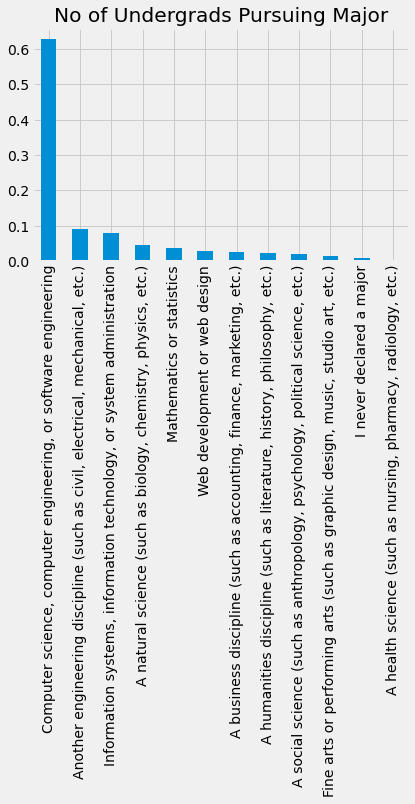

In [33]:
(vals1/df1.shape[0]).plot(kind="bar",rot=90);
plt.title("No of Undergrads Pursuing Major");

In [34]:
def display_bar_chart(df1, column, title):
    '''
    
    Displays a bar chart with a title
    
    Parameters:
    df: a dataframe
    column: the column which we want to show
    title: the title of the chart
    
    Returns:
    None
    
    '''
    status_vals = df1[column].value_counts()
    (status_vals[:10]/df1.shape[0]).plot(kind="bar");
    plt.title(title);

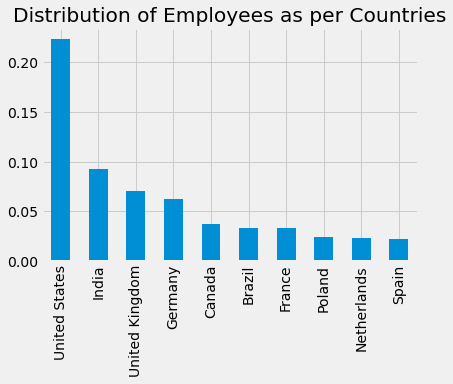

In [35]:
display_bar_chart(df1, "Country", "Distribution of Employees as per Countries")

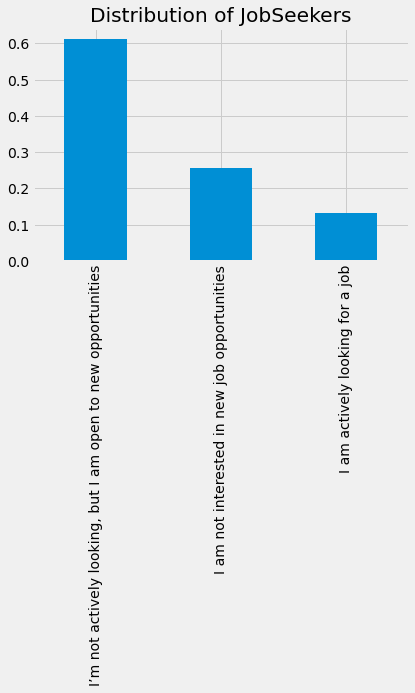

In [36]:
display_bar_chart(df1, "JobSeek", "Distribution of JobSeekers")

##  Conclusion of Question 3: 
Most of the Programming Developers are working in America and belong to 20-60 years age group on average, Maximum employees believe in working full time, and programming got most of the scope among Under graduates. 